In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from scipy.stats import probplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [13]:
# Load the Dataset:
# display

df = pd.read_csv('LungCancerpreprocessed.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,40.875,1,0,0,1,0,1,1,1,1,0,1,0,1,1
1,1,44.000,0,1,0,1,1,1,0,1,0,0,1,1,1,1
2,0,59.000,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,46.000,0,1,1,0,0,0,0,0,0,0,0,1,1,0
4,0,63.000,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1,77.000,0,1,0,1,0,1,1,1,1,1,0,0,0,1
272,1,77.000,1,1,1,0,1,0,1,1,0,0,0,1,1,1
273,1,78.000,0,1,0,1,1,1,0,1,0,0,1,1,1,1
274,1,79.000,1,0,0,0,1,1,1,1,1,1,1,1,1,1


In [14]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 276 non-null    int64  
 1   AGE                    276 non-null    float64
 2   SMOKING                276 non-null    int64  
 3   YELLOW_FINGERS         276 non-null    int64  
 4   ANXIETY                276 non-null    int64  
 5   PEER_PRESSURE          276 non-null    int64  
 6   CHRONIC DISEASE        276 non-null    int64  
 7   FATIGUE                276 non-null    int64  
 8   ALLERGY                276 non-null    int64  
 9   WHEEZING               276 non-null    int64  
 10  ALCOHOL CONSUMING      276 non-null    int64  
 11  COUGHING               276 non-null    int64  
 12  SHORTNESS OF BREATH    276 non-null    int64  
 13  SWALLOWING DIFFICULTY  276 non-null    int64  
 14  CHEST PAIN             276 non-null    int64  
 15  LUNG_C

(276, 16)

In [15]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.514493,62.990942,0.543478,0.576087,0.496377,0.507246,0.521739,0.663043,0.547101,0.554348,0.550725,0.576087,0.630435,0.467391,0.557971,0.862319
std,0.500698,8.036913,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.497940,0.498324,0.495075,0.483564,0.499842,0.497530,0.345191
min,0.000000,40.875000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,85.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

df = df.drop_duplicates()
print("\nDataFrame after dropping duplicates:")
print(df)

Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [GENDER, AGE, SMOKING, YELLOW_FINGERS, ANXIETY, PEER_PRESSURE, CHRONIC DISEASE, FATIGUE, ALLERGY, WHEEZING, ALCOHOL CONSUMING, COUGHING, SHORTNESS OF BREATH, SWALLOWING DIFFICULTY, CHEST PAIN, LUNG_CANCER]
Index: []

DataFrame after dropping duplicates:
     GENDER     AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1  40.875        1               0        0              1   
1         1  44.000        0               1        0              1   
2         0  59.000        0               0        0              1   
3         1  46.000        0               1        1              0   
4         0  63.000        0               1        0              0   
..      ...     ...      ...             ...      ...            ...   
271       1  77.000        0               1        0              1   
272       1  77.000        1               1        1              0   
273       1  78.000        0     

In [17]:
# Check for missing values
missing_values = df.isnull().sum()

# Print columns with missing values
columns_with_missing_values = missing_values[missing_values > 0].index
if not columns_with_missing_values.empty:
    print("Columns with missing values:")
    for column in columns_with_missing_values:
        print(column)
else:
    print("No missing values in the dataset.")
    
missing_values

No missing values in the dataset.


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<AxesSubplot:>

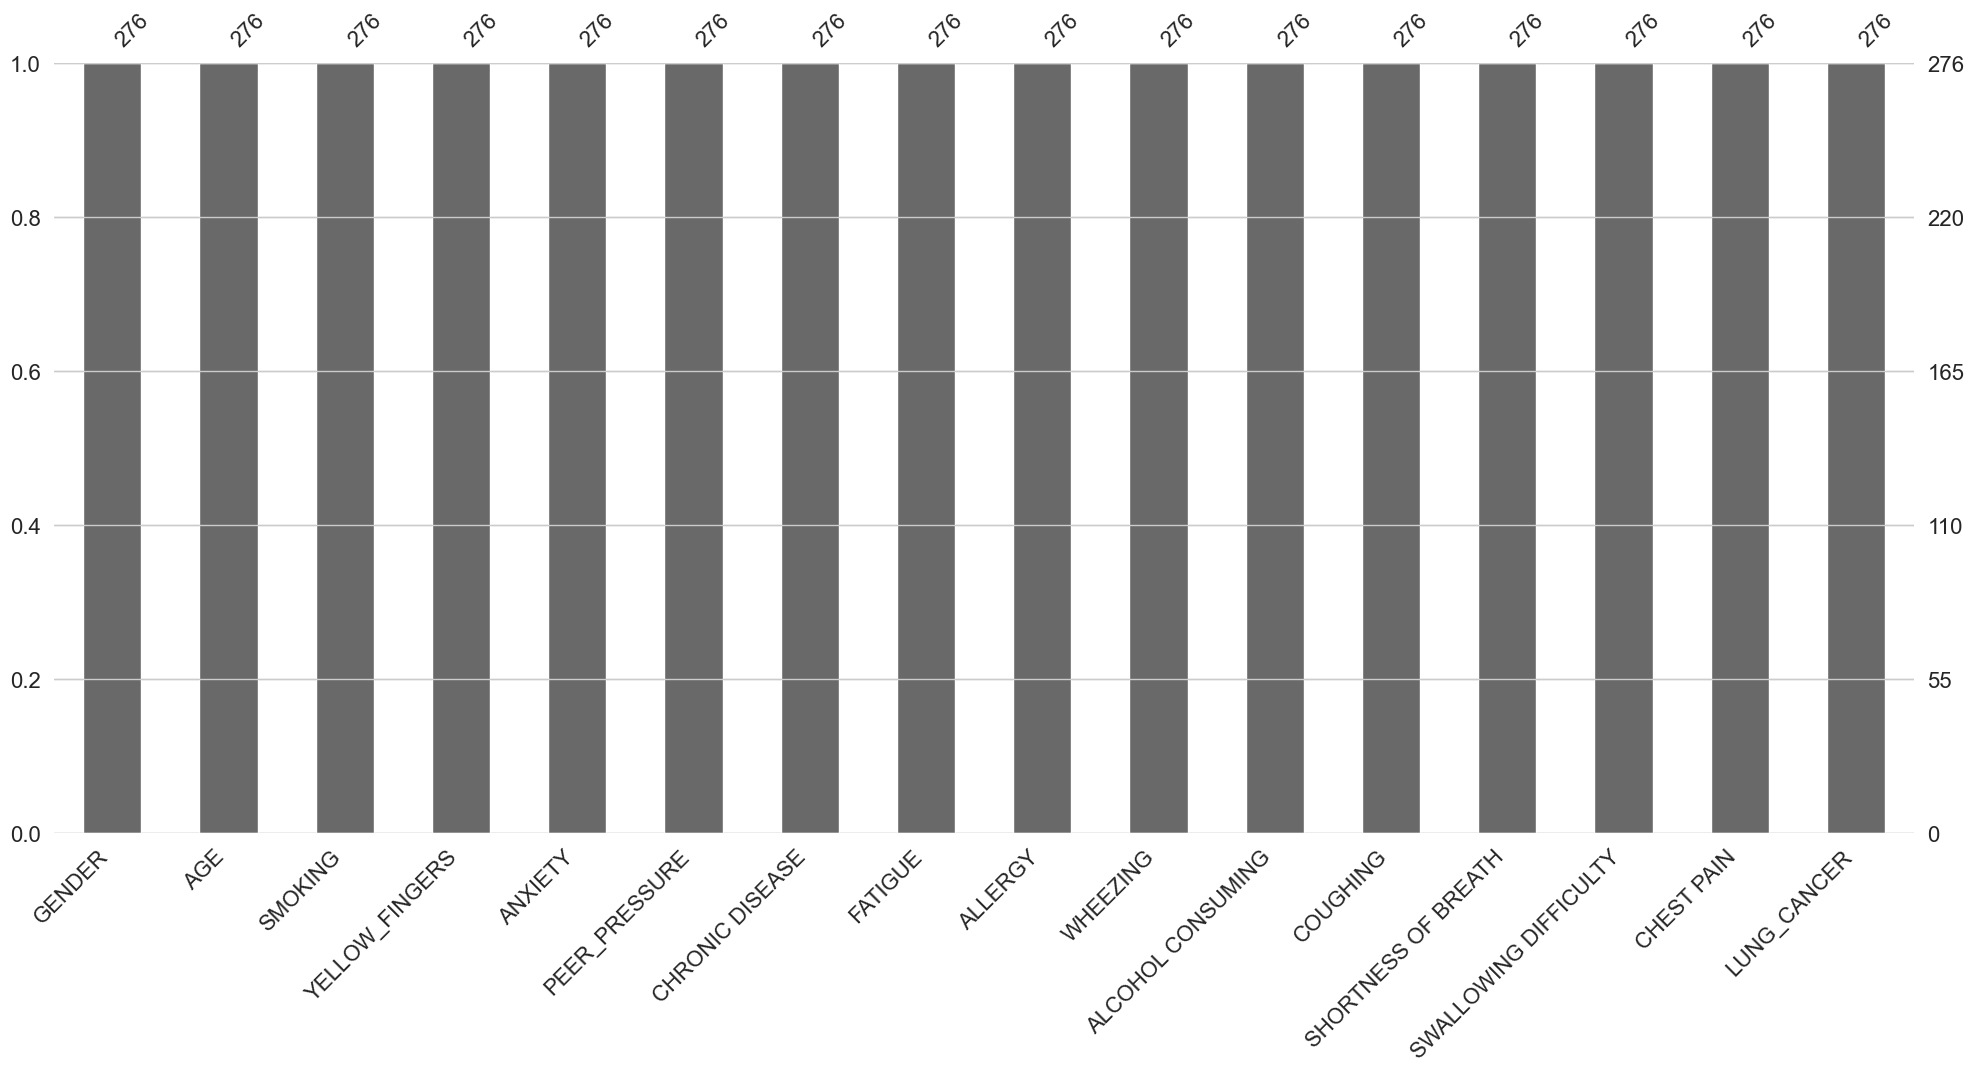

In [18]:
msno.bar(df)

C:\Users\pubgp\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\pubgp\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

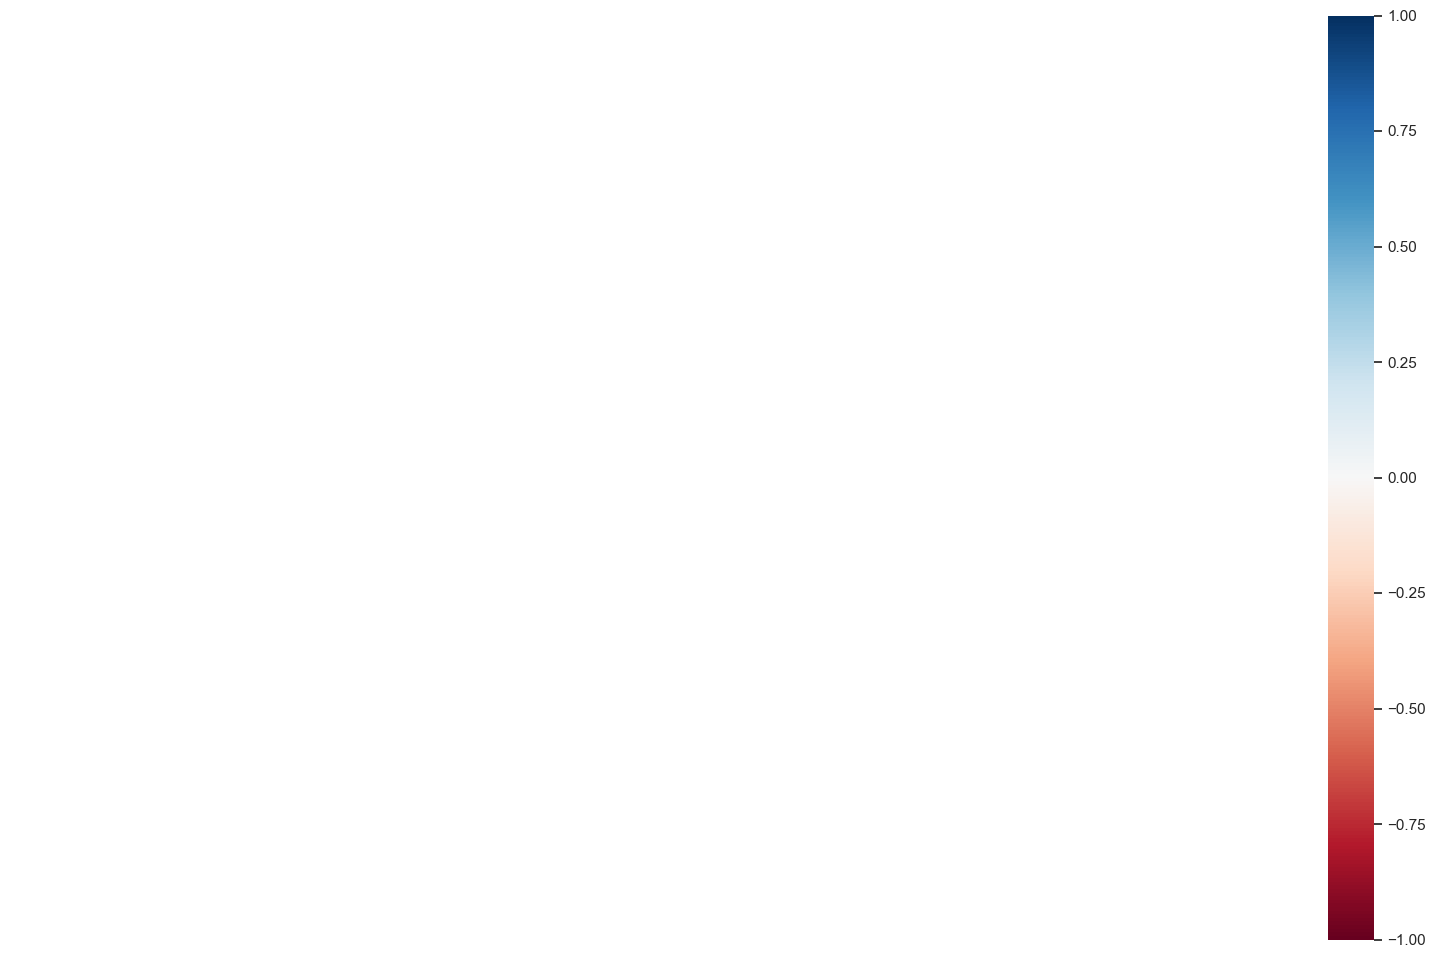

In [27]:

msno.heatmap(df)

C:\Users\pubgp\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:2846: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


<AxesSubplot:>

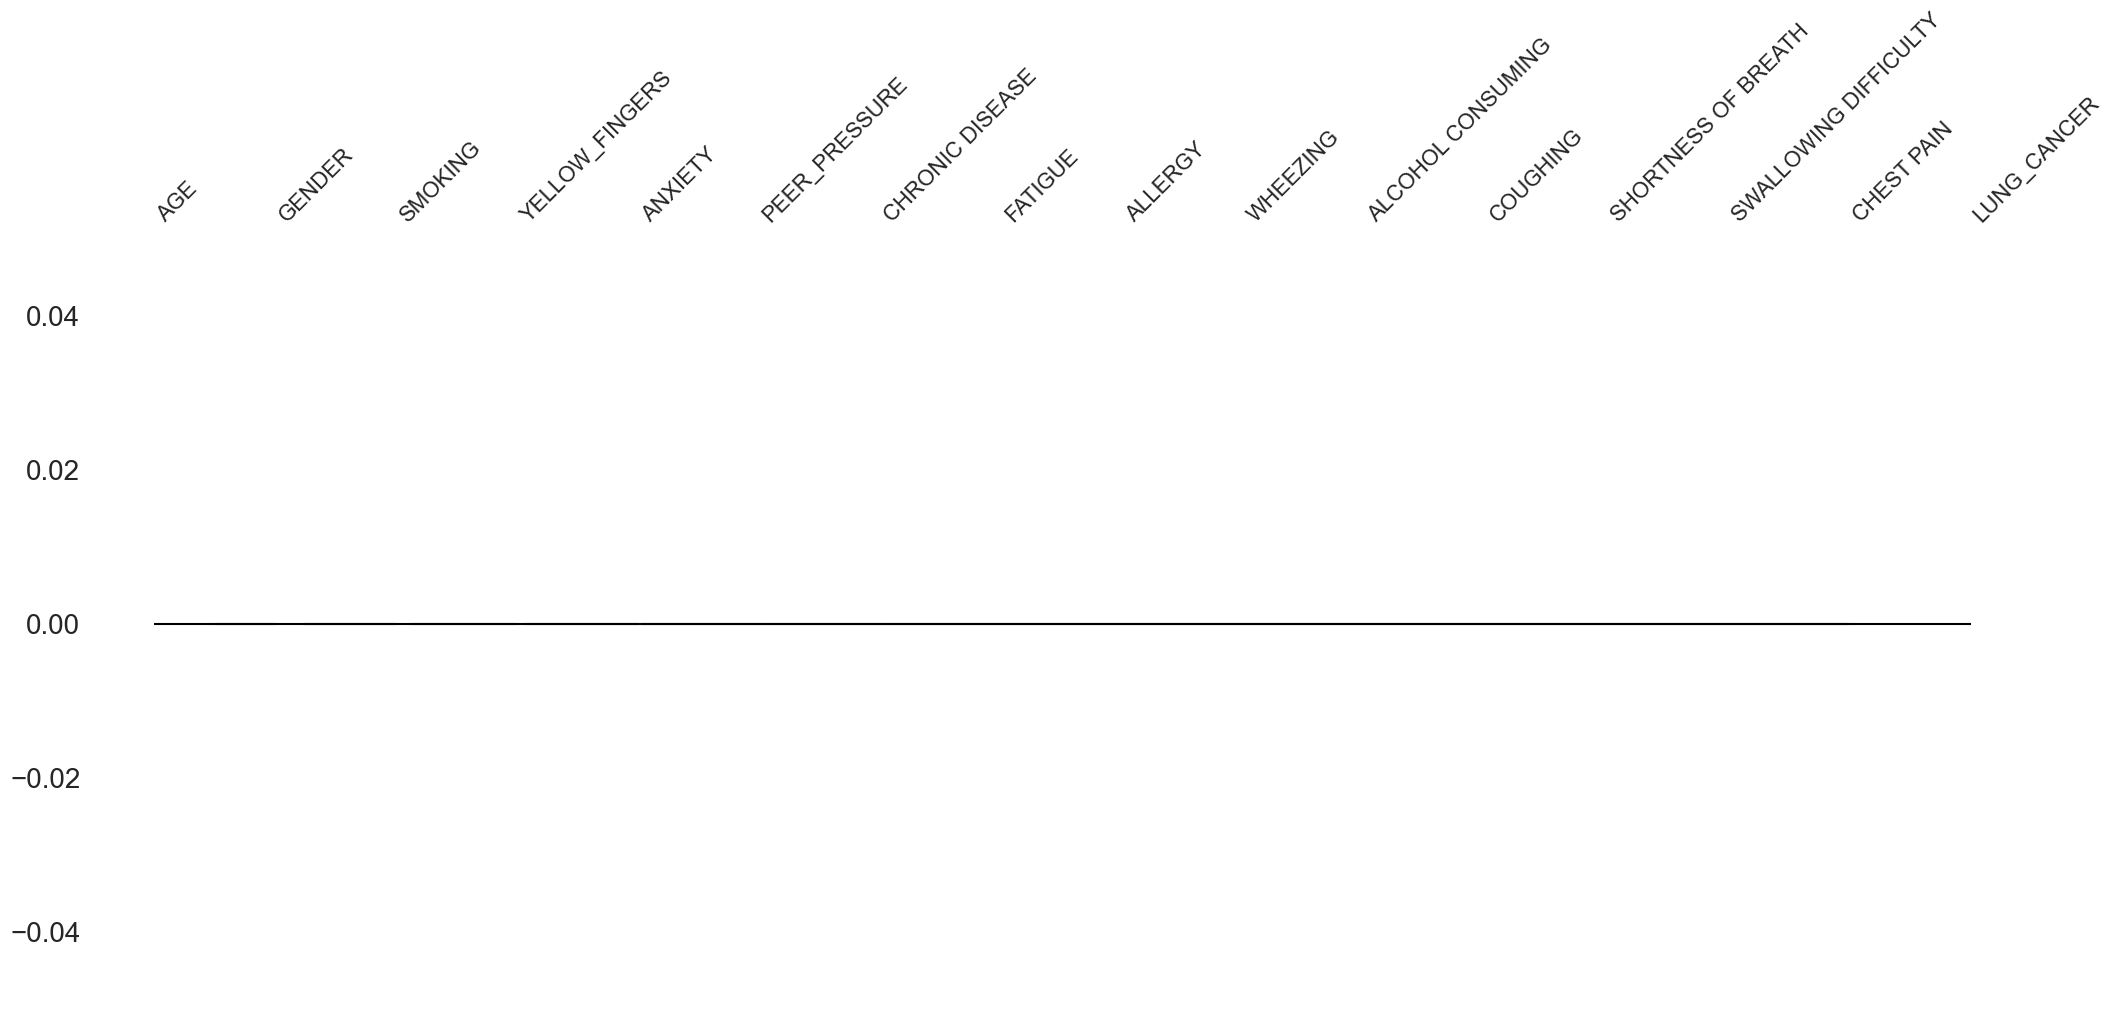

In [28]:

msno.dendrogram(df)

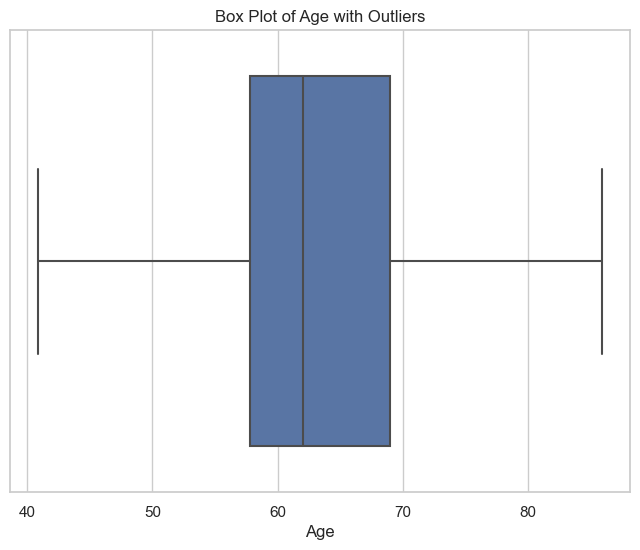

Outlier values in 'AGE' column:
Series([], Name: AGE, dtype: float64)


In [21]:
from scipy.stats import iqr

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['AGE'])
plt.xlabel('Age')
plt.title('Box Plot of Age with Outliers')
plt.show()

age_iqr = iqr(df['AGE'])

# Set lower and upper bounds for outliers
lower_bound = df['AGE'].quantile(0.25) - 1.5 * age_iqr
upper_bound = df['AGE'].quantile(0.75) + 1.5 * age_iqr

outliers = df[(df['AGE'] < lower_bound) | (df['AGE'] > upper_bound)]['AGE']
print("Outlier values in 'AGE' column:")
print(outliers)

In [22]:
skewness_age = skew(df['AGE'])
print("Skewness of AGE column:", skewness_age)

Skewness of AGE column: -0.061770296169842635


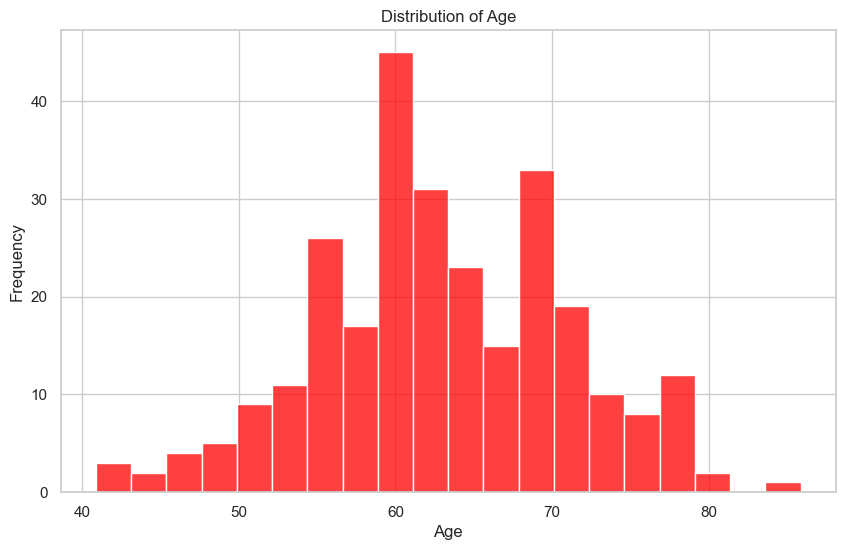

In [23]:
# Distribution of AGE

sns.set(style="whitegrid")  # Optional, for grid lines
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=False, color='red')  # You can adjust the number of bins as needed
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [24]:
corr=df.corr()
corr

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.023349,0.041131,-0.202506,-0.152032,-0.261427,-0.189925,-0.079020,0.150174,0.135389,0.434264,0.120228,-0.052893,-0.048959,0.361547,0.053666
AGE,-0.023349,1.000000,-0.068811,0.016739,0.041769,0.030844,0.005361,0.030727,0.049895,0.073725,0.043811,0.166621,-0.000864,-0.007089,-0.045339,0.091629
SMOKING,0.041131,-0.068811,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.133938,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.034878
YELLOW_FINGERS,-0.202506,0.016739,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.061088,-0.273643,0.020803,-0.109959,0.333349,-0.099169,0.189192
ANXIETY,-0.152032,0.041769,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174162,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,0.144322
PEER_PRESSURE,-0.261427,0.030844,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.038037,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,0.195086
CHRONIC DISEASE,-0.189925,0.005361,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.026648,0.010144,-0.160813,-0.011760,0.068263,-0.048895,0.143692
FATIGUE,-0.079020,0.030727,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.147348,-0.181573,0.148538,0.407027,-0.115727,0.013757,0.160078
ALLERGY,0.150174,0.049895,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.165385,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.333552
WHEEZING,0.135389,0.073725,-0.133938,-0.061088,-0.174162,-0.038037,-0.026648,0.147348,0.165385,1.000000,0.259962,0.351938,0.038412,0.109418,0.156035,0.255250


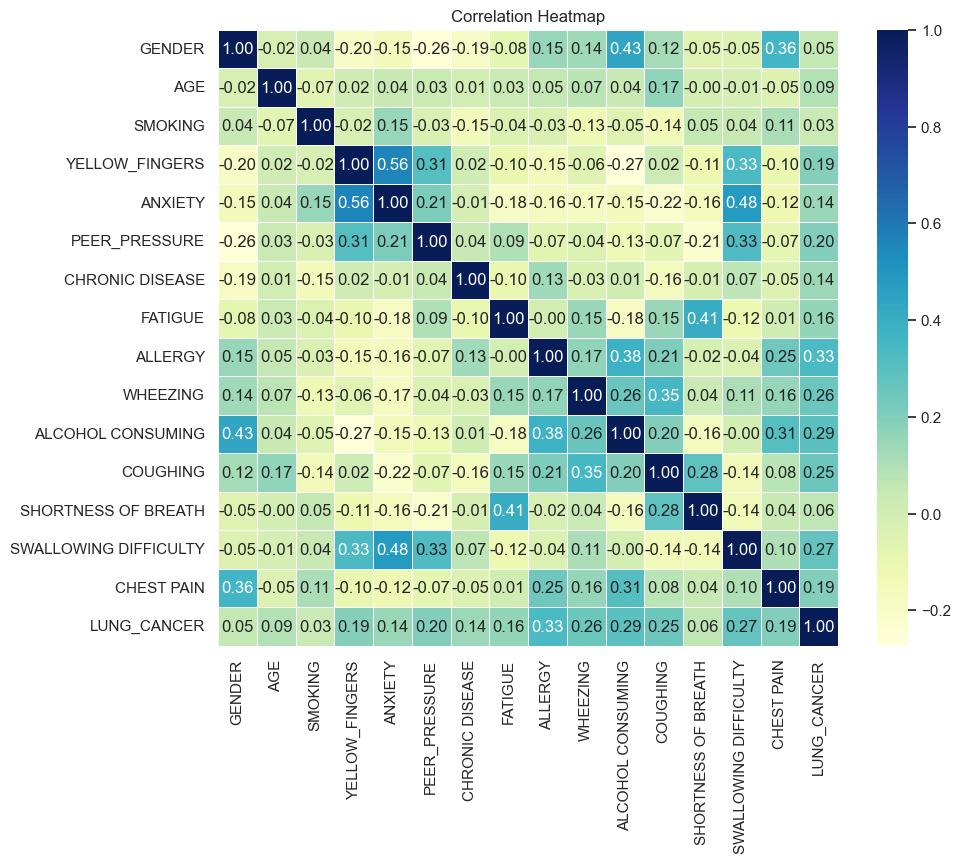

In [25]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()